In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd ## Used only to read data

In [2]:
# Loading dataset
data1 = pd.read_csv('datasets/crx.data',header = None)

In [3]:
# Function to convert the string data points to categorical data points
def categorical(x):
    cat = []
    t = 0
    for i in range(0,len(x)):
        if(x[i] == '?'):
            x[i] = 0
        elif(x[i] not in cat):
            cat.append(x[i])
            x[i] = t
            t+=1
        else:
            temp = cat.index(x[i])
            x[i] = temp

In [4]:
# Function to convert a matrix to float values
def to_float(x):
    for i in range(x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i][j] == '?'):
                x[i][j] = x[0][j]
            x[i][j] = float(x[i][j])

In [5]:
# Function to convert categorical values to one-hot format
def one_hot(x):
    m = np.max(x)
    res = np.zeros([x.shape[0],int(m)+1])
    for i in range(0,res.shape[0]):
        res[i][int(x[i])] = 1
    return res

In [6]:
## Sigmoid function
def sigmoid(x):
    res = np.empty(x.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i,j]<-700):              #### Used to overcome overflow error
                res[i,j] = 0.0
            else:
                res[i,j] = 1.0/(1+np.exp(-x[i,j]))
    return res

In [7]:
# This step might show a warning. However, this does not affect with the preformance.
categorical(data1[0])
categorical(data1[3])
categorical(data1[4])
categorical(data1[5])
categorical(data1[6])
categorical(data1[8])
categorical(data1[9])
categorical(data1[11])
categorical(data1[12])
categorical(data1[15])
print(data1.shape)

/home/raktim/anaconda3/envs/raktim/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/raktim/anaconda3/envs/raktim/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/raktim/anaconda3/envs/raktim/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

(690, 16)


In [8]:
data2 = np.array(data1)
to_float(data2)

In [9]:
data3 = []
ind = [3,4,5,6,12]
for i in range(data2.shape[1]):
    if(i in ind):
        temp = one_hot(data2[:,i])
        for j in range(0,temp.shape[1]):
            data3.append(temp[:,j])
    else:
        data3.append(data2[:,i])

In [10]:
data = np.array(data3)
data = data.T
print(data.shape)

(690, 43)


In [11]:
### Creating features and labels for train and test set
### 10% of total data used as test data

x_train1 = np.empty([int(data.shape[0]*0.9),data.shape[1]])
y_train1 = np.empty([int(data.shape[0]*0.9),1])
x_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),data.shape[1]])
y_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),1])

for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]-1):
        if(i<int(data.shape[0]*0.9)):
            x_train1[i,j] = data[i][j]
        else:
            x_test1[i-int(data.shape[0]*0.9),j] = data[i][j]

# Using bias term
x_train1[:,42] = 1e-2
x_test1[:,42] = 1e-2


for i in range(0,data.shape[0]):
    if(i<int(data.shape[0]*0.9)):
        y_train1[i,0] = data[i][42]
    else:
        y_test1[i-int(data.shape[0]*0.9),0] = data[i][42]
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(621, 43) (69, 43) (621, 1) (69, 1)


In [12]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = np.empty(x_train.shape[1])
v = np.empty(x_train.shape[1])
ind1 = [1,2,32,35,40,41]
for i in range(0,x_train1.shape[1]):
    if(i in ind1):
        mean = np.mean(x_train1[:,i])
        var = np.var(x_train1[:,i])
        m[i] = mean
        v[i] = var
        x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
        x_train[:,i] = x_train[:,i]/var
    else:
        x_train[:,i] = x_train1[:,i]

y_test = y_test1

y_train = y_train1


In [16]:
# Training
epochs = 5000  ## Number of epochs
w = np.ones([x_train.shape[1],1])
batch_size = 621     ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.8   ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = sigmoid(x_train[b:b+batch_size]@w)
        y_pred_t = np.reshape(y_pred,y_pred.shape[0])
        
        
        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]        
    
    y_pred = sigmoid(x_train@w)
    l1 = -np.sum(y_train*np.log(y_pred) + (1-y_train)*np.log(1-y_pred))/y_pred.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 2.5140672629149567
Epoch 1 Loss 1.8950207784660842
Epoch 2 Loss 1.3354763320148355
Epoch 3 Loss 0.9295078222425575
Epoch 4 Loss 0.7376905272887424
Epoch 5 Loss 0.671802888271802
Epoch 6 Loss 0.6418412907402774
Epoch 7 Loss 0.6206536163971963
Epoch 8 Loss 0.6026177301851373
Epoch 9 Loss 0.5865073149925523
Epoch 10 Loss 0.5719524734006045
Epoch 11 Loss 0.5587627958247646
Epoch 12 Loss 0.5467944722507019
Epoch 13 Loss 0.5359229042570004
Epoch 14 Loss 0.5260363802452512
Epoch 15 Loss 0.5170341008255301
Epoch 16 Loss 0.5088251524509296
Epoch 17 Loss 0.5013277099070501
Epoch 18 Loss 0.49446830677545833
Epoch 19 Loss 0.4881811366266745
Epoch 20 Loss 0.48240737843895726
Epoch 21 Loss 0.47709454856425054
Epoch 22 Loss 0.4721958840244417
Epoch 23 Loss 0.4676697619636364
Epoch 24 Loss 0.4634791590619019
Epoch 25 Loss 0.4595911532869377
Epoch 26 Loss 0.45597646889230437
Epoch 27 Loss 0.4526090642678799
Epoch 28 Loss 0.4494657612037442
Epoch 29 Loss 0.44652591336555747
Epoch 30 Loss 0.

Epoch 252 Loss 0.3626054436387195
Epoch 253 Loss 0.36252383206629185
Epoch 254 Loss 0.36244253890936956
Epoch 255 Loss 0.3623615606969109
Epoch 256 Loss 0.3622808940168883
Epoch 257 Loss 0.36220053551511544
Epoch 258 Loss 0.362120481894101
Epoch 259 Loss 0.36204072991192965
Epoch 260 Loss 0.3619612763811681
Epoch 261 Loss 0.36188211816779536
Epoch 262 Loss 0.36180325219015647
Epoch 263 Loss 0.36172467541794107
Epoch 264 Loss 0.36164638487118295
Epoch 265 Loss 0.3615683776192831
Epoch 266 Loss 0.3614906507800543
Epoch 267 Loss 0.36141320151878514
Epoch 268 Loss 0.361336027047327
Epoch 269 Loss 0.3612591246231992
Epoch 270 Loss 0.3611824915487142
Epoch 271 Loss 0.3611061251701219
Epoch 272 Loss 0.3610300228767724
Epoch 273 Loss 0.3609541821002966
Epoch 274 Loss 0.36087860031380536
Epoch 275 Loss 0.3608032750311038
Epoch 276 Loss 0.36072820380592413
Epoch 277 Loss 0.3606533842311757
Epoch 278 Loss 0.36057881393820734
Epoch 279 Loss 0.3605044905960892
Epoch 280 Loss 0.3604304119109077
Epoc

Epoch 522 Loss 0.34695975791408873
Epoch 523 Loss 0.3469168215501734
Epoch 524 Loss 0.34687396555934863
Epoch 525 Loss 0.34683118977602156
Epoch 526 Loss 0.3467884940357574
Epoch 527 Loss 0.34674587817527025
Epoch 528 Loss 0.34670334203241615
Epoch 529 Loss 0.34666088544618406
Epoch 530 Loss 0.3466185082566883
Epoch 531 Loss 0.34657621030516067
Epoch 532 Loss 0.34653399143394326
Epoch 533 Loss 0.34649185148647976
Epoch 534 Loss 0.34644979030730927
Epoch 535 Loss 0.34640780774205815
Epoch 536 Loss 0.346365903637433
Epoch 537 Loss 0.3463240778412136
Epoch 538 Loss 0.34628233020224564
Epoch 539 Loss 0.3462406605704342
Epoch 540 Loss 0.34619906879673634
Epoch 541 Loss 0.34615755473315485
Epoch 542 Loss 0.3461161182327314
Epoch 543 Loss 0.34607475914954
Epoch 544 Loss 0.3460334773386803
Epoch 545 Loss 0.34599227265627147
Epoch 546 Loss 0.34595114495944596
Epoch 547 Loss 0.3459100941063428
Epoch 548 Loss 0.34586911995610203
Epoch 549 Loss 0.3458282223688581
Epoch 550 Loss 0.34578740120573415

Epoch 802 Loss 0.3376859421150567
Epoch 803 Loss 0.33766176459992026
Epoch 804 Loss 0.3376376451268603
Epoch 805 Loss 0.33761358362357047
Epoch 806 Loss 0.3375895800172869
Epoch 807 Loss 0.3375656342347865
Epoch 808 Loss 0.3375417462023851
Epoch 809 Loss 0.3375179158459358
Epoch 810 Loss 0.33749414309082837
Epoch 811 Loss 0.33747042786198683
Epoch 812 Loss 0.3374467700838686
Epoch 813 Loss 0.3374231696804638
Epoch 814 Loss 0.3373996265752934
Epoch 815 Loss 0.33737614069140875
Epoch 816 Loss 0.3373527119513907
Epoch 817 Loss 0.3373293402773486
Epoch 818 Loss 0.33730602559092
Epoch 819 Loss 0.33728276781326944
Epoch 820 Loss 0.33725956686508884
Epoch 821 Loss 0.33723642266659604
Epoch 822 Loss 0.3372133351375358
Epoch 823 Loss 0.33719030419717844
Epoch 824 Loss 0.3371673297643203
Epoch 825 Loss 0.3371444117572838
Epoch 826 Loss 0.3371215500939172
Epoch 827 Loss 0.3370987446915952
Epoch 828 Loss 0.33707599546721856
Epoch 829 Loss 0.33705330233721525
Epoch 830 Loss 0.3370306652175405
Epoch

Epoch 1059 Loss 0.33311152276843
Epoch 1060 Loss 0.3330989346032598
Epoch 1061 Loss 0.33308637726542917
Epoch 1062 Loss 0.33307385065456985
Epoch 1063 Loss 0.3330613546705869
Epoch 1064 Loss 0.3330488892136588
Epoch 1065 Loss 0.33303645418423894
Epoch 1066 Loss 0.3330240494830558
Epoch 1067 Loss 0.33301167501111417
Epoch 1068 Loss 0.3329993306696955
Epoch 1069 Loss 0.3329870163603587
Epoch 1070 Loss 0.33297473198494115
Epoch 1071 Loss 0.33296247744555857
Epoch 1072 Loss 0.3329502526446065
Epoch 1073 Loss 0.3329380574847602
Epoch 1074 Loss 0.3329258918689758
Epoch 1075 Loss 0.33291375570049025
Epoch 1076 Loss 0.33290164888282253
Epoch 1077 Loss 0.33288957131977337
Epoch 1078 Loss 0.3328775229154264
Epoch 1079 Loss 0.33286550357414824
Epoch 1080 Loss 0.33285351320058926
Epoch 1081 Loss 0.33284155169968344
Epoch 1082 Loss 0.3328296189766492
Epoch 1083 Loss 0.33281771493699
Epoch 1084 Loss 0.3328058394864939
Epoch 1085 Loss 0.33279399253123454
Epoch 1086 Loss 0.3327821739775716
Epoch 1087 

Epoch 1293 Loss 0.3308286117966065
Epoch 1294 Loss 0.3308210804545802
Epoch 1295 Loss 0.3308135637123899
Epoch 1296 Loss 0.3308060615269125
Epoch 1297 Loss 0.3307985738551917
Epoch 1298 Loss 0.33079110065443745
Epoch 1299 Loss 0.33078364188202597
Epoch 1300 Loss 0.330776197495498
Epoch 1301 Loss 0.3307687674525589
Epoch 1302 Loss 0.33076135171107746
Epoch 1303 Loss 0.33075395022908577
Epoch 1304 Loss 0.33074656296477817
Epoch 1305 Loss 0.3307391898765103
Epoch 1306 Loss 0.3307318309227994
Epoch 1307 Loss 0.33072448606232235
Epoch 1308 Loss 0.3307171552539164
Epoch 1309 Loss 0.330709838456577
Epoch 1310 Loss 0.33070253562945856
Epoch 1311 Loss 0.3306952467318728
Epoch 1312 Loss 0.33068797172328845
Epoch 1313 Loss 0.33068071056333076
Epoch 1314 Loss 0.3306734632117806
Epoch 1315 Loss 0.3306662296285738
Epoch 1316 Loss 0.33065900977380047
Epoch 1317 Loss 0.3306518036077048
Epoch 1318 Loss 0.33064461109068405
Epoch 1319 Loss 0.33063743218328734
Epoch 1320 Loss 0.33063026684621644
Epoch 132

Epoch 1557 Loss 0.32924337481586574
Epoch 1558 Loss 0.32923859325989757
Epoch 1559 Loss 0.32923381905265686
Epoch 1560 Loss 0.3292290521775282
Epoch 1561 Loss 0.3292242926179504
Epoch 1562 Loss 0.3292195403574163
Epoch 1563 Loss 0.32921479537947235
Epoch 1564 Loss 0.32921005766771855
Epoch 1565 Loss 0.3292053272058082
Epoch 1566 Loss 0.3292006039774476
Epoch 1567 Loss 0.32919588796639604
Epoch 1568 Loss 0.3291911791564652
Epoch 1569 Loss 0.3291864775315195
Epoch 1570 Loss 0.32918178307547524
Epoch 1571 Loss 0.32917709577230103
Epoch 1572 Loss 0.32917241560601684
Epoch 1573 Loss 0.32916774256069464
Epoch 1574 Loss 0.32916307662045746
Epoch 1575 Loss 0.32915841776947946
Epoch 1576 Loss 0.3291537659919859
Epoch 1577 Loss 0.32914912127225265
Epoch 1578 Loss 0.32914448359460624
Epoch 1579 Loss 0.32913985294342324
Epoch 1580 Loss 0.32913522930313055
Epoch 1581 Loss 0.3291306126582048
Epoch 1582 Loss 0.3291260029931725
Epoch 1583 Loss 0.32912140029260956
Epoch 1584 Loss 0.3291168045411412
Epo

Epoch 1813 Loss 0.32822106815174173
Epoch 1814 Loss 0.32821774376932106
Epoch 1815 Loss 0.32821442377756127
Epoch 1816 Loss 0.32821110816858756
Epoch 1817 Loss 0.3282077969345455
Epoch 1818 Loss 0.328204490067601
Epoch 1819 Loss 0.32820118755993993
Epoch 1820 Loss 0.3281978894037684
Epoch 1821 Loss 0.3281945955913125
Epoch 1822 Loss 0.3281913061148184
Epoch 1823 Loss 0.328188020966552
Epoch 1824 Loss 0.32818474013879906
Epoch 1825 Loss 0.32818146362386524
Epoch 1826 Loss 0.3281781914140758
Epoch 1827 Loss 0.3281749235017754
Epoch 1828 Loss 0.32817165987932867
Epoch 1829 Loss 0.3281684005391193
Epoch 1830 Loss 0.32816514547355063
Epoch 1831 Loss 0.3281618946750455
Epoch 1832 Loss 0.3281586481360455
Epoch 1833 Loss 0.32815540584901204
Epoch 1834 Loss 0.3281521678064252
Epoch 1835 Loss 0.3281489340007844
Epoch 1836 Loss 0.328145704424608
Epoch 1837 Loss 0.32814247907043326
Epoch 1838 Loss 0.3281392579308164
Epoch 1839 Loss 0.3281360409983324
Epoch 1840 Loss 0.328132828265575
Epoch 1841 Lo

Epoch 2047 Loss 0.327548384563591
Epoch 2048 Loss 0.3275459084900113
Epoch 2049 Loss 0.3275434353977907
Epoch 2050 Loss 0.3275409652823578
Epoch 2051 Loss 0.32753849813915104
Epoch 2052 Loss 0.3275360339636181
Epoch 2053 Loss 0.3275335727512162
Epoch 2054 Loss 0.32753111449741196
Epoch 2055 Loss 0.32752865919768165
Epoch 2056 Loss 0.3275262068475106
Epoch 2057 Loss 0.3275237574423937
Epoch 2058 Loss 0.32752131097783516
Epoch 2059 Loss 0.3275188674493484
Epoch 2060 Loss 0.3275164268524563
Epoch 2061 Loss 0.32751398918269076
Epoch 2062 Loss 0.32751155443559316
Epoch 2063 Loss 0.3275091226067138
Epoch 2064 Loss 0.3275066936916123
Epoch 2065 Loss 0.32750426768585744
Epoch 2066 Loss 0.3275018445850272
Epoch 2067 Loss 0.3274994243847083
Epoch 2068 Loss 0.327497007080497
Epoch 2069 Loss 0.3274945926679983
Epoch 2070 Loss 0.3274921811428262
Epoch 2071 Loss 0.32748977250060385
Epoch 2072 Loss 0.32748736673696316
Epoch 2073 Loss 0.32748496384754516
Epoch 2074 Loss 0.32748256382799973
Epoch 2075 

Epoch 2287 Loss 0.32703035987943385
Epoch 2288 Loss 0.32702848668956
Epoch 2289 Loss 0.32702661560500873
Epoch 2290 Loss 0.32702474662287906
Epoch 2291 Loss 0.32702287974027505
Epoch 2292 Loss 0.3270210149543061
Epoch 2293 Loss 0.32701915226208605
Epoch 2294 Loss 0.3270172916607342
Epoch 2295 Loss 0.3270154331473744
Epoch 2296 Loss 0.3270135767191359
Epoch 2297 Loss 0.32701172237315257
Epoch 2298 Loss 0.3270098701065632
Epoch 2299 Loss 0.32700801991651157
Epoch 2300 Loss 0.3270061718001463
Epoch 2301 Loss 0.327004325754621
Epoch 2302 Loss 0.3270024817770942
Epoch 2303 Loss 0.327000639864729
Epoch 2304 Loss 0.32699880001469367
Epoch 2305 Loss 0.326996962224161
Epoch 2306 Loss 0.32699512649030915
Epoch 2307 Loss 0.32699329281032047
Epoch 2308 Loss 0.32699146118138245
Epoch 2309 Loss 0.3269896316006874
Epoch 2310 Loss 0.32698780406543215
Epoch 2311 Loss 0.32698597857281875
Epoch 2312 Loss 0.32698415512005347
Epoch 2313 Loss 0.3269823337043477
Epoch 2314 Loss 0.3269805143229175
Epoch 2315 

Epoch 2526 Loss 0.32663662412948796
Epoch 2527 Loss 0.326635181470052
Epoch 2528 Loss 0.326633740342325
Epoch 2529 Loss 0.3266323007443313
Epoch 2530 Loss 0.3266308626740985
Epoch 2531 Loss 0.32662942612965706
Epoch 2532 Loss 0.3266279911090404
Epoch 2533 Loss 0.3266265576102848
Epoch 2534 Loss 0.3266251256314297
Epoch 2535 Loss 0.3266236951705173
Epoch 2536 Loss 0.3266222662255929
Epoch 2537 Loss 0.32662083879470466
Epoch 2538 Loss 0.32661941287590346
Epoch 2539 Loss 0.32661798846724355
Epoch 2540 Loss 0.3266165655667817
Epoch 2541 Loss 0.3266151441725779
Epoch 2542 Loss 0.32661372428269475
Epoch 2543 Loss 0.326612305895198
Epoch 2544 Loss 0.3266108890081561
Epoch 2545 Loss 0.32660947361964054
Epoch 2546 Loss 0.3266080597277256
Epoch 2547 Loss 0.32660664733048855
Epoch 2548 Loss 0.32660523642600936
Epoch 2549 Loss 0.326603827012371
Epoch 2550 Loss 0.32660241908765936
Epoch 2551 Loss 0.32660101264996294
Epoch 2552 Loss 0.32659960769737345
Epoch 2553 Loss 0.32659820422798497
Epoch 2554 

Epoch 2772 Loss 0.3263234514567047
Epoch 2773 Loss 0.3263223325967772
Epoch 2774 Loss 0.32632121486007737
Epoch 2775 Loss 0.3263200982452193
Epoch 2776 Loss 0.3263189827508189
Epoch 2777 Loss 0.326317868375494
Epoch 2778 Loss 0.3263167551178643
Epoch 2779 Loss 0.3263156429765516
Epoch 2780 Loss 0.3263145319501793
Epoch 2781 Loss 0.326313422037373
Epoch 2782 Loss 0.32631231323676013
Epoch 2783 Loss 0.3263112055469698
Epoch 2784 Loss 0.3263100989666333
Epoch 2785 Loss 0.3263089934943838
Epoch 2786 Loss 0.32630788912885617
Epoch 2787 Loss 0.3263067858686873
Epoch 2788 Loss 0.32630568371251584
Epoch 2789 Loss 0.3263045826589824
Epoch 2790 Loss 0.32630348270672965
Epoch 2791 Loss 0.3263023838544018
Epoch 2792 Loss 0.3263012861006452
Epoch 2793 Loss 0.3263001894441079
Epoch 2794 Loss 0.32629909388343986
Epoch 2795 Loss 0.32629799941729304
Epoch 2796 Loss 0.3262969060443211
Epoch 2797 Loss 0.32629581376317957
Epoch 2798 Loss 0.32629472257252573
Epoch 2799 Loss 0.32629363247101917
Epoch 2800 L

Epoch 3028 Loss 0.32607016590149474
Epoch 3029 Loss 0.3260692941674993
Epoch 3030 Loss 0.32606842325705665
Epoch 3031 Loss 0.32606755316918684
Epoch 3032 Loss 0.3260666839029111
Epoch 3033 Loss 0.326065815457252
Epoch 3034 Loss 0.32606494783123374
Epoch 3035 Loss 0.3260640810238813
Epoch 3036 Loss 0.3260632150342213
Epoch 3037 Loss 0.32606234986128163
Epoch 3038 Loss 0.3260614855040912
Epoch 3039 Loss 0.32606062196168056
Epoch 3040 Loss 0.3260597592330813
Epoch 3041 Loss 0.3260588973173264
Epoch 3042 Loss 0.32605803621345003
Epoch 3043 Loss 0.3260571759204879
Epoch 3044 Loss 0.32605631643747657
Epoch 3045 Loss 0.3260554577634543
Epoch 3046 Loss 0.3260545998974604
Epoch 3047 Loss 0.3260537428385354
Epoch 3048 Loss 0.32605288658572135
Epoch 3049 Loss 0.3260520311380613
Epoch 3050 Loss 0.32605117649459964
Epoch 3051 Loss 0.3260503226543822
Epoch 3052 Loss 0.32604946961645587
Epoch 3053 Loss 0.32604861737986895
Epoch 3054 Loss 0.32604776594367074
Epoch 3055 Loss 0.3260469153069121
Epoch 30

Epoch 3269 Loss 0.32588180425400876
Epoch 3270 Loss 0.3258811054147966
Epoch 3271 Loss 0.32588040719666367
Epoch 3272 Loss 0.3258797095988962
Epoch 3273 Loss 0.32587901262078056
Epoch 3274 Loss 0.32587831626160474
Epoch 3275 Loss 0.32587762052065716
Epoch 3276 Loss 0.32587692539722757
Epoch 3277 Loss 0.32587623089060624
Epoch 3278 Loss 0.32587553700008476
Epoch 3279 Loss 0.32587484372495523
Epoch 3280 Loss 0.325874151064511
Epoch 3281 Loss 0.3258734590180462
Epoch 3282 Loss 0.32587276758485595
Epoch 3283 Loss 0.32587207676423624
Epoch 3284 Loss 0.32587138655548387
Epoch 3285 Loss 0.3258706969578967
Epoch 3286 Loss 0.3258700079707735
Epoch 3287 Loss 0.3258693195934137
Epoch 3288 Loss 0.32586863182511805
Epoch 3289 Loss 0.3258679446651879
Epoch 3290 Loss 0.3258672581129257
Epoch 3291 Loss 0.32586657216763454
Epoch 3292 Loss 0.32586588682861867
Epoch 3293 Loss 0.3258652020951832
Epoch 3294 Loss 0.325864517966634
Epoch 3295 Loss 0.32586383444227807
Epoch 3296 Loss 0.325863151521423
Epoch 3

Epoch 3525 Loss 0.3257213514589046
Epoch 3526 Loss 0.3257207906626437
Epoch 3527 Loss 0.32572023033170266
Epoch 3528 Loss 0.32571967046556777
Epoch 3529 Loss 0.3257191110637263
Epoch 3530 Loss 0.3257185521256661
Epoch 3531 Loss 0.3257179936508753
Epoch 3532 Loss 0.3257174356388431
Epoch 3533 Loss 0.32571687808905936
Epoch 3534 Loss 0.3257163210010143
Epoch 3535 Loss 0.3257157643741989
Epoch 3536 Loss 0.325715208208105
Epoch 3537 Loss 0.3257146525022248
Epoch 3538 Loss 0.3257140972560513
Epoch 3539 Loss 0.32571354246907813
Epoch 3540 Loss 0.3257129881407996
Epoch 3541 Loss 0.3257124342707105
Epoch 3542 Loss 0.32571188085830644
Epoch 3543 Loss 0.3257113279030836
Epoch 3544 Loss 0.3257107754045388
Epoch 3545 Loss 0.3257102233621695
Epoch 3546 Loss 0.3257096717754739
Epoch 3547 Loss 0.32570912064395063
Epoch 3548 Loss 0.3257085699670991
Epoch 3549 Loss 0.32570801974441954
Epoch 3550 Loss 0.3257074699754124
Epoch 3551 Loss 0.32570692065957896
Epoch 3552 Loss 0.3257063717964213
Epoch 3553 Lo

Epoch 3783 Loss 0.3255907504119881
Epoch 3784 Loss 0.32559029434689885
Epoch 3785 Loss 0.32558983863405405
Epoch 3786 Loss 0.3255893832730831
Epoch 3787 Loss 0.3255889282636155
Epoch 3788 Loss 0.32558847360528165
Epoch 3789 Loss 0.3255880192977121
Epoch 3790 Loss 0.325587565340538
Epoch 3791 Loss 0.32558711173339094
Epoch 3792 Loss 0.32558665847590296
Epoch 3793 Loss 0.32558620556770657
Epoch 3794 Loss 0.32558575300843484
Epoch 3795 Loss 0.325585300797721
Epoch 3796 Loss 0.3255848489351991
Epoch 3797 Loss 0.3255843974205033
Epoch 3798 Loss 0.32558394625326853
Epoch 3799 Loss 0.3255834954331299
Epoch 3800 Loss 0.32558304495972334
Epoch 3801 Loss 0.32558259483268476
Epoch 3802 Loss 0.32558214505165095
Epoch 3803 Loss 0.32558169561625877
Epoch 3804 Loss 0.3255812465261459
Epoch 3805 Loss 0.3255807977809503
Epoch 3806 Loss 0.3255803493803104
Epoch 3807 Loss 0.3255799013238649
Epoch 3808 Loss 0.3255794536112531
Epoch 3809 Loss 0.32557900624211505
Epoch 3810 Loss 0.3255785592160907
Epoch 381

Epoch 4036 Loss 0.3254856782523341
Epoch 4037 Loss 0.3254853006238635
Epoch 4038 Loss 0.3254849232670623
Epoch 4039 Loss 0.3254845461816588
Epoch 4040 Loss 0.32548416936738217
Epoch 4041 Loss 0.32548379282396134
Epoch 4042 Loss 0.32548341655112595
Epoch 4043 Loss 0.32548304054860583
Epoch 4044 Loss 0.32548266481613114
Epoch 4045 Loss 0.32548228935343243
Epoch 4046 Loss 0.3254819141602404
Epoch 4047 Loss 0.3254815392362865
Epoch 4048 Loss 0.3254811645813019
Epoch 4049 Loss 0.3254807901950186
Epoch 4050 Loss 0.32548041607716854
Epoch 4051 Loss 0.32548004222748433
Epoch 4052 Loss 0.3254796686456988
Epoch 4053 Loss 0.32547929533154496
Epoch 4054 Loss 0.32547892228475617
Epoch 4055 Loss 0.3254785495050664
Epoch 4056 Loss 0.32547817699220943
Epoch 4057 Loss 0.32547780474591986
Epoch 4058 Loss 0.32547743276593233
Epoch 4059 Loss 0.32547706105198204
Epoch 4060 Loss 0.325476689603804
Epoch 4061 Loss 0.3254763184211342
Epoch 4062 Loss 0.32547594750370845
Epoch 4063 Loss 0.3254755768512632
Epoch 

Epoch 4288 Loss 0.3253984428478605
Epoch 4289 Loss 0.3253981258944219
Epoch 4290 Loss 0.3253978091535825
Epoch 4291 Loss 0.32539749262514134
Epoch 4292 Loss 0.32539717630889775
Epoch 4293 Loss 0.325396860204651
Epoch 4294 Loss 0.3253965443122008
Epoch 4295 Loss 0.32539622863134715
Epoch 4296 Loss 0.3253959131618901
Epoch 4297 Loss 0.32539559790363015
Epoch 4298 Loss 0.32539528285636793
Epoch 4299 Loss 0.32539496801990425
Epoch 4300 Loss 0.3253946533940402
Epoch 4301 Loss 0.3253943389785771
Epoch 4302 Loss 0.3253940247733165
Epoch 4303 Loss 0.3253937107780603
Epoch 4304 Loss 0.3253933969926104
Epoch 4305 Loss 0.325393083416769
Epoch 4306 Loss 0.3253927700503387
Epoch 4307 Loss 0.325392456893122
Epoch 4308 Loss 0.32539214394492216
Epoch 4309 Loss 0.32539183120554216
Epoch 4310 Loss 0.3253915186747854
Epoch 4311 Loss 0.32539120635245555
Epoch 4312 Loss 0.3253908942383564
Epoch 4313 Loss 0.32539058233229207
Epoch 4314 Loss 0.3253902706340669
Epoch 4315 Loss 0.3253899591434854
Epoch 4316 Lo

Epoch 4531 Loss 0.3253272307189162
Epoch 4532 Loss 0.32532696003035344
Epoch 4533 Loss 0.3253266895117741
Epoch 4534 Loss 0.3253264191630261
Epoch 4535 Loss 0.32532614898395745
Epoch 4536 Loss 0.3253258789744163
Epoch 4537 Loss 0.3253256091342511
Epoch 4538 Loss 0.3253253394633103
Epoch 4539 Loss 0.3253250699614428
Epoch 4540 Loss 0.3253248006284972
Epoch 4541 Loss 0.3253245314643228
Epoch 4542 Loss 0.32532426246876867
Epoch 4543 Loss 0.3253239936416843
Epoch 4544 Loss 0.3253237249829191
Epoch 4545 Loss 0.32532345649232297
Epoch 4546 Loss 0.3253231881697458
Epoch 4547 Loss 0.32532292001503754
Epoch 4548 Loss 0.3253226520280484
Epoch 4549 Loss 0.3253223842086289
Epoch 4550 Loss 0.32532211655662957
Epoch 4551 Loss 0.32532184907190104
Epoch 4552 Loss 0.3253215817542943
Epoch 4553 Loss 0.3253213146036605
Epoch 4554 Loss 0.32532104761985065
Epoch 4555 Loss 0.3253207808027163
Epoch 4556 Loss 0.32532051415210905
Epoch 4557 Loss 0.3253202476678806
Epoch 4558 Loss 0.3253199813498827
Epoch 4559 

Epoch 4778 Loss 0.3252651817084437
Epoch 4779 Loss 0.3252649487754174
Epoch 4780 Loss 0.32526471597947076
Epoch 4781 Loss 0.3252644833204878
Epoch 4782 Loss 0.3252642507983527
Epoch 4783 Loss 0.32526401841294955
Epoch 4784 Loss 0.3252637861641627
Epoch 4785 Loss 0.3252635540518765
Epoch 4786 Loss 0.3252633220759757
Epoch 4787 Loss 0.3252630902363448
Epoch 4788 Loss 0.32526285853286874
Epoch 4789 Loss 0.3252626269654325
Epoch 4790 Loss 0.3252623955339208
Epoch 4791 Loss 0.32526216423821913
Epoch 4792 Loss 0.3252619330782128
Epoch 4793 Loss 0.325261702053787
Epoch 4794 Loss 0.32526147116482756
Epoch 4795 Loss 0.3252612404112199
Epoch 4796 Loss 0.32526100979285
Epoch 4797 Loss 0.32526077930960356
Epoch 4798 Loss 0.32526054896136686
Epoch 4799 Loss 0.32526031874802575
Epoch 4800 Loss 0.3252600886694668
Epoch 4801 Loss 0.3252598587255763
Epoch 4802 Loss 0.32525962891624066
Epoch 4803 Loss 0.3252593992413466
Epoch 4804 Loss 0.32525916970078095
Epoch 4805 Loss 0.3252589402944304
Epoch 4806 Lo

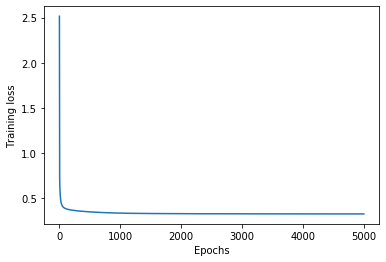

In [17]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [18]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    if(i in ind1):
        x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
        x_test[:,i] = x_test[:,i]/v[i]
    else:
        x_test[:,i] = x_test1[:,i]

In [19]:
## Predicting on test set and finding accuracy on test set
print("Predicting on test set")
y_hat = sigmoid(x_test@w)
loss = -np.sum(y_test*np.log(y_hat) + (1-y_test)*np.log(1-y_hat))/y_hat.shape[0]
print("Testing loss =",loss)
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]<0.5):
        y_hat[i] = 0
    else:
        y_hat[i] = 1
tot = 0.0
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]==y_test[i]):
        tot+=1   
print("Testing accuracy =",(tot/y_hat.shape[0])*100,"%")

Predicting on test set
Testing loss = 0.16312259863252299
Testing accuracy = 95.65217391304348 %
